In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from keras.layers import Activation, Dense

from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


# Dataset Loading and Dividing for train and test

In [0]:
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

## Shape of the Dataset

In [111]:
print('Shape of x_train data :', x_train.shape)
print('Shape of x_test data :',x_test.shape)
print('Shape of y_train data :', y_train.shape)
print('Shape of y_test data :', y_test.shape)

Shape of x_train data : (60000, 28, 28)
Shape of x_test data : (10000, 28, 28)
Shape of y_train data : (60000,)
Shape of y_test data : (10000,)


## Unique Classes

In [112]:
#printing the total classes of the model
classes = np.unique(y_train)
n_classes = len(classes)

#printing the classes and the total number of classes
print('Total number of classes :', nclasses)
print('Classes number :', classes)

Total number of classes : 10
Classes number : [0 1 2 3 4 5 6 7 8 9]


## Visualize two images

Text(0.5, 1.0, 'Original truth : 9')

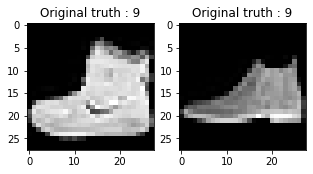

In [113]:
#plotting the first image from training data
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title('Original truth : {}'.format(y_train[0]))

#plotting the first image from testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title('Original truth : {}'.format(y_test[0]))

##Reshaping the data before training

In [114]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print('Shape of train_X :',x_train.shape)
print('Shape of test_X :',x_test.shape)

Shape of train_X : (60000, 28, 28, 1)
Shape of test_X : (10000, 28, 28, 1)


# converting data type to float32

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## rescaling the pixel values in range 0-1

In [116]:
x_train = x_train / 255
x_test = x_test / 255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## categorical to one-hot encoding

In [117]:
#Changing the labels from categorical to one-hot encoding
train_y_one_hot = to_categorical(y_train)
test_y_one_hot = to_categorical(y_test)

#Displaying the change for category label using one-hot encoding
print('Original label :', y_train[0])
print('After conversion to one hot :', train_y_one_hot[0])

#Displaying the shape of the 
print(train_y_one_hot.shape)
print(test_y_one_hot.shape)

Original label : 9
After conversion to one hot : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(60000, 10)
(10000, 10)


## spliting training data into train and validation data

In [118]:
train_X, valid_X, train_valid, valid_Y = train_test_split(x_train, train_y_one_hot, test_size=0.2, random_state=13)
print(train_X.shape, '\n',valid_X.shape,'\n',train_valid.shape,'\n',valid_Y.shape)

(48000, 28, 28, 1) 
 (12000, 28, 28, 1) 
 (48000, 10) 
 (12000, 10)


## Model

In [0]:
#Network architecture
#adding 1st convolutional layer Conv2D(). Because working with images
#adding LeakyReLU() activation function. Because it helps the network to learn 
#non-linear decision boundaries. Since I have 10 different classes, I shall need a 
#nonlinear decision boundary. 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28,28,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='softmax'))

In [120]:
#summary of the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)         

## Compiling The Model

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, 
                      optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy'])

## Training The Model

In [122]:
model_history = model.fit(train_X, train_valid, batch_size=64, 
                                          epochs=20, verbose=1, validation_data=(valid_X, valid_Y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 131us/step - loss: 0.5994 - accuracy: 0.7784 - val_loss: 0.3789 - val_accuracy: 0.8659
Epoch 2/20
48000/48000 [==============================] - 6s 127us/step - loss: 0.3777 - accuracy: 0.8627 - val_loss: 0.3176 - val_accuracy: 0.8855
Epoch 3/20
48000/48000 [==============================] - 6s 124us/step - loss: 0.3317 - accuracy: 0.8781 - val_loss: 0.2730 - val_accuracy: 0.8958
Epoch 4/20
48000/48000 [==============================] - 6s 126us/step - loss: 0.2971 - accuracy: 0.8896 - val_loss: 0.2602 - val_accuracy: 0.9038
Epoch 5/20
48000/48000 [==============================] - 6s 127us/step - loss: 0.2788 - accuracy: 0.8954 - val_loss: 0.2446 - val_accuracy: 0.9085
Epoch 6/20
48000/48000 [==============================] - 6s 125us/step - loss: 0.2684 - accuracy: 0.9019 - val_loss: 0.2408 - val_accuracy: 0.9106
Epoch 7/20
48000/48000 [==============================] - 6s 1

## Evaluating with Test data

In [123]:
test_eval = model.evaluate(x_test, test_y_one_hot, verbose=1)

print('Test loss :',test_eval[0])
print('Test accuracy :',test_eval[1])

10000/10000 [==============================] - 1s 82us/step
Test loss : 0.2194664430677891
Test accuracy : 0.9212999939918518


## Accuracy and Loss graph

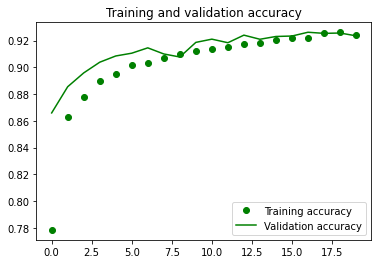

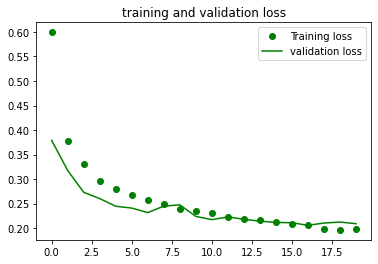

In [124]:
accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'go', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

from graph we are seeing our model is very good because training accuracy, validation accuracy and
training loss and validation loss curve goes through one direction

## Predicting with test data

In [125]:
predicted_classes = model.predict(x_test)

#converting float value to integer value
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)
print(predicted_classes.shape)
print(y_test.shape)

(10000,)
(10000,)


## classification Report

In [126]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.86      0.88      1000
           3       0.93      0.92      0.93      1000
           4       0.89      0.88      0.88      1000
           5       0.99      0.97      0.98      1000
           6       0.78      0.76      0.77      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Confusion Matrix

Text(91.68, 0.5, 'predicted label')

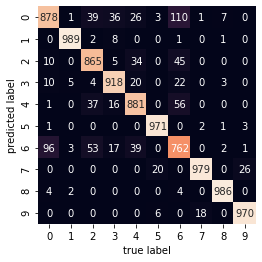

In [127]:
mat = confusion_matrix(y_test, predicted_classes)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

most of the miss prediction is happend in 0,2,4 and 6

## Some correct data

Found 9199 correct labels 


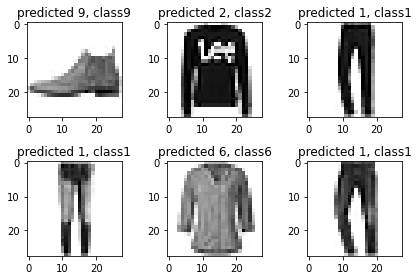

In [128]:
#printing the total correct data
correct_data = np.where(predicted_classes==y_test)[0]
print('Found %d correct labels '%len(correct_data))

#printing some correct data
for i, correct in enumerate(correct_data[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='binary', interpolation='none')
    plt.title('predicted {}, class{}'.format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

## Some incorrect data

Found 801 incorrect data


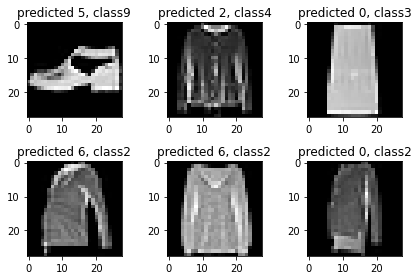

In [129]:
#printing the total incorrect data
incorrect_data = np.where(predicted_classes!=y_test)[0]
print('Found %d incorrect data'%len(incorrect_data))

#printing some incorrect data
for i, incorrect in enumerate(incorrect_data[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title('predicted {}, class{}'.format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()